In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## AdaLiNe GD

In [4]:
class AdaLiNeGD:
    def __init__(self, lr = 0.01, n_iter = 50):
        self.lr = lr # Taza de aprendizaje
        self.n_iter = n_iter

    def fit(self, X, y):        
        self.w_ = np.zeros(1 + X.shape[1]) # Iniciar con pesos en 0
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X) # Recortado debido a que se usa f(x) = x
            errors = (y - output) # Calcula el error
            self.w_[1:] += self.lr * X.T.dot(errors) # Cambia los pesos, X.T.dot(errors) = derivada parcial?
            self.w_[0] += self.lr * errors.sum() # que hace w0?...
            cost = (errors**2).sum() / 2.0 # calcula el coste
            self.cost_.append(cost) # guarda el coste
        return self

    def net_input(self, X): # Esto es calcular z
        return np.dot(X, self.w_[1:]) + self.w_[0] 

    def predict(self, X):
        # self.activation(self.net_input(X)) -> self.net_input(X)
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### AdaLiNe GD - Notas

#### fit

* Recorté toda la parte de la función de activación porque entiendo que no influye en nada, segun Rashka, es algo simbolico para, más adelante, cambiarlo por regresion logistica.  
    Veo que tambien se usa en predict, también lo recorté ahí.
* Creo que no comprendo lo que hace la parte "errors = (y - output)"  
    Creo que ya entiendo, es como la otra vez, si el output es diferente a y entonces ahi es cuando se aclcula el error.  
    Ya entiendo de dode surge, es parte de la derivada parcial.
* en la parte de "X.T.dot(errors)", yo entiendo que todo eso es el calculo de la derivada parcial.
* Entender como se involucra w0 me cuesta trabajo, creo que tengo que ponerle mas atencion.  
    Ahora que lo pienso, w0 es el limite de activación(o algo asi)... <- __Investigar sobre eso__

## Dataset

In [7]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, header = None, encoding = 'utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### y

In [10]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

### X

In [11]:
X = df.iloc[0:100, [0, 2]].values

### Estandarizando x

In [28]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

## Entrenando

In [29]:
ada_gd = AdaLiNeGD(lr = 0.01, n_iter = 10)
ada_gd.fit(X_std, y)

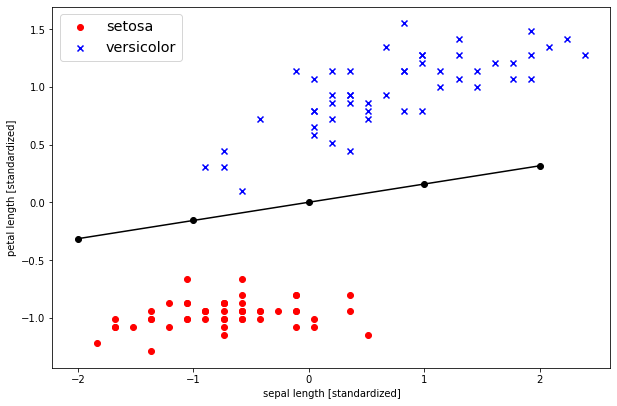

In [65]:
fig, ax = plt.subplots(figsize = [10,8])

#fig.suptitle('', fontsize = 26)

ax.set_aspect(aspect = 1)

ax.set_xlabel('sepal length [standardized]')
ax.set_ylabel('petal length [standardized]')

ax.scatter(
    X_std[:50, 0], 
    X_std[:50, 1], 
    color = 'red', 
    marker = 'o', 
    label = 'setosa'
)

ax.scatter(
    X_std[50:100, 0], 
    X_std[50:100, 1],
    color = 'blue', 
    marker = 'x', 
    label = 'versicolor'
)

ws = ada_gd.w_
plt.plot(
    list(range(-2, 3)), 
    [(-ws[0] -(ws[1]*x))/ws[2] for x in range(-2,3)], 
    marker = 'o',
    color = 'black'
)

plt.legend(fontsize = 'x-large')

Text(0, 0.5, 'Sum-squared-error')

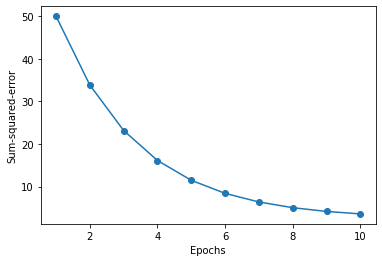

In [66]:
plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')